# IBM CLOUD DEPLOYMENT


TEAM ID - PNT2022TMID07944

# Importing the required libraries

In [4]:
!pip install tensorflow --upgrade

In [14]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Conv2D 
from keras.utils import np_utils 
import matplotlib.pyplot as plt  

# Load data

In [6]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

In [7]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

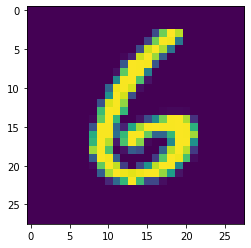

In [9]:
plt.imshow(x_train[6000]) 

In [10]:
np.argmax(y_train[6000])

0

# Reshaping Dataset

In [11]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [12]:
number_of_classes = 10 

In [13]:
y_train = np_utils.to_categorical (y_train, number_of_classes)
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [18]:
#create model
model=Sequential ()

#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

#flatten the dimension of the image
model.add(Flatten())

#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [22]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [17]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 148s 78ms/step - loss: 0.2397 - accuracy: 0.9534 - val_loss: 0.1028 - val_accuracy: 0.9700
Epoch 2/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0713 - accuracy: 0.9786 - val_loss: 0.0798 - val_accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.0803 - val_accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.0832 - val_accuracy: 0.9743
Epoch 5/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0879 - val_accuracy: 0.9801


# Observing the metrics

In [23]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[25.22157096862793, 0.156700000166893]


# Test the model

In [24]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 123ms/step
[[3.9303019e-09 3.3449905e-04 5.4201824e-16 1.2281362e-11 9.2898397e-12
  4.1284504e-05 6.4167126e-18 6.2254042e-14 9.9962413e-01 1.1046440e-08]]


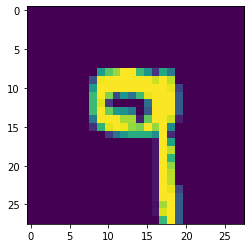

In [25]:
plt.imshow(x_test[6000])

In [26]:
import numpy as np
print(np.argmax(prediction, axis=1))

[8]


In [27]:
np.argmax(y_test[6000:6001])

9

# Save the model

In [53]:
model.save('mnistCNN.h5')

In [54]:
ls

CNN_MODEL.tgz  mnistCNN.h5


In [55]:
!tar -zcvf CNN_MODEL.tgz mnistCNN.h5

mnistCNN.h5


In [51]:
!pip install watson-machine-learning-client --upgrade

# Cloud deploy

In [57]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"y7B9baiG1PIgNQThcpXuwrlqUFB3Dg_lwt7vYIcMyVrX"
}
client = APIClient(credentials)
client

In [58]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/12f5daba587d41dfbd31f12c5a95693e:eee4bac7-f3fc-4235-ae0f-a98ae301588c::',
      'guid': 'eee4bac7-f3fc-4235-ae0f-a98ae301588c',
      'name': 'Watson Machine Learning-r1',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'digit_recognition',
    'scope': {'bss_account_id': '12f5daba587d41dfbd31f12c5a95693e'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'c7b09146-a013-4237-b92e-2776c0dc704b',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '09f713627a0742b3889a84c16a995073',
        'api_key': '8UR1B1Z-F43SeHnJ9HcIvjd_09aHIMkcDeC2JKG4jUEM',
        'secret_access_key': '37049596390ee4fd5f3e297892b07e21c601bc0085f06513',
        'service_id': 'ServiceId-af2d5bf5-6636-421c-8679-08e2cd43f612'},
       'editor': {'access_key_id': '2b0a2f063e8648978ce2c89b9f37708a',
        'ap

In [59]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [60]:
space_uid = guid_from_space_name(client,'digit_recognition')
print("Space UID = " + space_uid)

Space UID = 1ac1c9de-ff78-4716-8b6d-eb3a1913eaa2


In [61]:
client.set.default_space(space_uid)


'SUCCESS'

In [62]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [63]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [64]:
model_details = client.repository.store_model(model='CNN_MODEL.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [65]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T13:57:58.249Z',
  'id': '70ce6875-06c6-4b35-a395-ce9954a3a689',
  'modified_at': '2022-11-18T13:58:02.707Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-666002P30B',
  'resource_key': 'cbefb3c1-8188-4262-a056-9bed30f2a3ef',
  'space_id': '1ac1c9de-ff78-4716-8b6d-eb3a1913eaa2'},
 'system': {'warnings': []}}

In [66]:
model_id = client.repository.get_model_id(model_details)
model_id

'70ce6875-06c6-4b35-a395-ce9954a3a689'

In [67]:
client.repository.download(model_id,'DigitRecognition_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecognition_IBM_model.tar.gz'


'/home/wsuser/work/DigitRecognition_IBM_model.tar.gz'

In [68]:
ls

CNN_MODEL.tgz  DigitRecognition_IBM_model.tar.gz  mnistCNN.h5


# Test the model

In [69]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [70]:
model = load_model("mnistCNN.h5")

In [71]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='is_QZGPyU8oxZr3W-td-LCHXS3QPMaWArILi18FdSyGT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenimagerecognition-donotdelete-pr-8tlrnykut46vpi'
object_key = 'mnist-dataset-1024x424 (2).png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']


In [72]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [73]:
img

In [74]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [75]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 131ms/step
[[8.5318929e-01 5.4800282e-08 1.7162986e-23 5.7494623e-20 7.0213463e-19
  4.5404690e-08 2.1834187e-17 6.9161124e-24 1.4681061e-01 1.9131366e-15]]


In [76]:
print(np.argmax(pred, axis=1))

[0]
